# **ÁRVORES DE REGRESSÃO - PARTE 1 (Árvore de Decisão)**

As árvores de decisão geralmente consistem em três elementos diferentes:

Nó Raiz:

O nó de nível superior representa o objetivo final ou a grande decisão que você está tentando tomar.

Galhos:

Ramos, que se originam da raiz, representam diferentes opções – ou cursos de ação – que estão disponíveis ao tomar uma decisão específica. Eles são mais comumente indicados com uma linha de seta e geralmente incluem custos associados, bem como a probabilidade de ocorrer.

Nó da folha:

Os nós das folhas – que são anexados ao final das ramificações – representam possíveis resultados para cada ação. Normalmente existem dois tipos de nós folha: nós folha quadrados, que indicam outra decisão a ser tomada, e nós folha circulares, que indicam um evento casual ou resultado desconhecido.
Elas são divididas em dois tipos principais: categóricas e contínuas. Na primeira há inclusão de variáveis, chamadas de variáveis de destino, em categorias. Essas categorias são definidas a priori e há um aspecto limitante nestas categorias definidas. Já a segunda está associada como uma variável que terá seu destino contínuo. Por exemplo, se não se sabe a renda de determinada família, esta renda pode ser identificada a partir de outra informação, como idade, cargo, dentre outras.
 

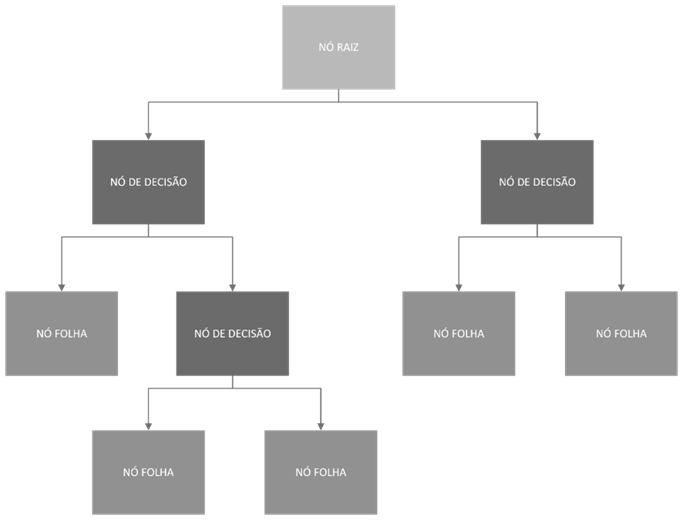

# **ÁRVORES DE REGRESSÃO - PARTE 2 (Florestas Aleatórias)**

Já as florestas aleatórias têm como finalidade a resolução de problemas de regressão e classificação, utilizando três hiper parâmetros: tamanho do nó, número de arvores e número dos recursos de determinada amostra. No fim das contas, uma floresta aleatória é composta de diversas árvores de decisão.

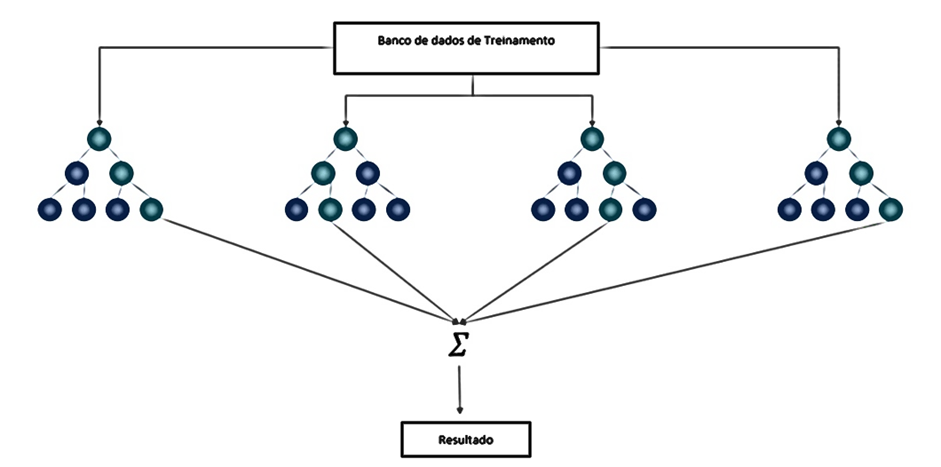
 



# **ÁRVORES DE REGRESSÃO - PARTE 3 (ExtraTrees)**

O algoritmo de machine learning ExtraTrees (Extremely Randomized Trees) cria muitas árvores de decisão de maneira aleatória, para então através da combinação dos resultados de cada árvore encontrar a resposta final.

Seu principal diferencial está no fato deste processo ser extremamente aleatório, contribuindo assim para modelos mais generalizáveis.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
a = pd.read_csv('/content/wine_dataset.csv')

In [5]:
arq = a.head()


In [13]:
y = a['style']
X = a.drop('style', axis=1)


In [15]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

In [20]:
modelo = ExtraTreesClassifier()


In [22]:
modelo.fit(X_treino, y_treino)

ExtraTreesClassifier()

In [25]:
resultado = modelo.score(X_teste, y_teste)
print("Acurácia:", resultado)

Acurácia: 0.9974358974358974


In [26]:
real = y_teste[300:307]
print(real)


5539    white
5941    white
1072      red
1784    white
4038    white
371       red
6042    white
Name: style, dtype: object


In [28]:
pre = modelo.predict((X_teste[300:307]))
print(pre)

['white' 'white' 'red' 'white' 'white' 'red' 'white']


# **ÁRVORES DE REGRESSÃO - PARTE 4 (Classificações com Árvores e Florestas)**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df = pd.read_csv('/content/kyphosis.csv')

In [31]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


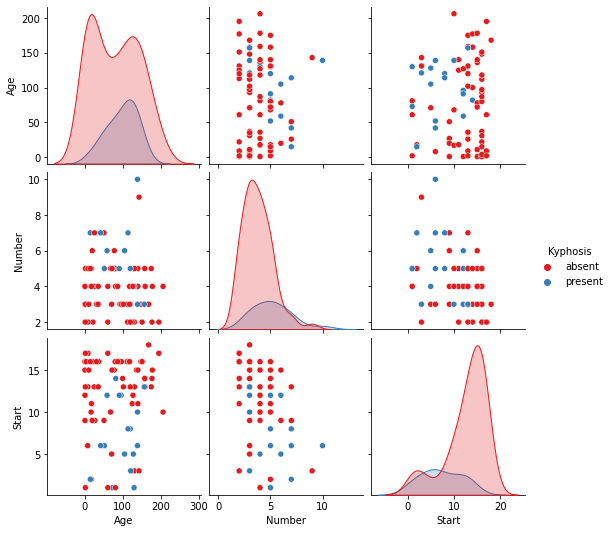

In [32]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Árvores de decisão

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtree = DecisionTreeClassifier()

In [39]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
predictions = dtree.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.79      0.95      0.86        20
     present       0.00      0.00      0.00         5

    accuracy                           0.76        25
   macro avg       0.40      0.47      0.43        25
weighted avg       0.63      0.76      0.69        25



In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
rfc_pred = rfc.predict(X_test)

In [47]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.80      1.00      0.89        20
     present       0.00      0.00      0.00         5

    accuracy                           0.80        25
   macro avg       0.40      0.50      0.44        25
weighted avg       0.64      0.80      0.71        25



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
